# EDA - Exploratory Data Analysis.
A Análise Exploratória de Dados a seguir tem como objetivo responder alguns questionamentos relacionados às vendas feitas por uma organização de comércio varejista bengali. Os dados que alimentam a análise foram coletados entre os anos de 2014 e 2021 (2021 apenas o mês de janeiro) e os valores monetários estão na moeda local, o Taka Bengali (Tk).

In [1]:
import sqlite3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import matplotlib.ticker as ticker
import seaborn as sns
from scipy.stats import pearsonr  # Para calcular correlação de Pearson

In [2]:
# Conecta ao banco de dados.
con = sqlite3.connect("projetoecommerce.db")

In [3]:
# Armazena o cursor.
cur = con.cursor()

In [4]:
# Executa a consulta SQL e carrega no DataFrame dfecommerce.
dfecommerce = pd.read_sql_query("""
    SELECT *
    FROM fact_table
    LEFT JOIN customer_dim ON customer_dim.customer_key = fact_table.coustomer_key
    LEFT JOIN item_dim ON item_dim.item_key = fact_table.item_key
    LEFT JOIN store_dim_com_population ON store_dim_com_population.store_key = fact_table.store_key
    LEFT JOIN time_dim ON time_dim.time_key = fact_table.time_key
    LEFT JOIN Trans_dim ON Trans_dim.payment_key = fact_table.payment_key
""", con)

In [5]:
pd.set_option('display.max_columns', None) # Estabelece que todas as colunas do DataFrame apareçam.

In [6]:
# Converte as colunas 'date', 'hour', 'day', 'month' e 'year' de int64 para object. Isso é feito para evitar que essas colunas sejam consideradas nas estatísticas como 
# valores numéricos.
dfecommerce[['date', 'hour', 'day', 'month', 'year']] = dfecommerce[['date', 'hour', 'day', 'month', 'year']].astype(object)

In [7]:
# Remove colunas duplicadas (item_key).
dfecommerce = dfecommerce.loc[:, ~dfecommerce.columns.duplicated()]

In [8]:
dfecommerce.to_sql("dfecommerce", con, if_exists="replace", index=False) # Converte o DataFrame dfecommerce em uma tabela de mesmo nome do DataBase 
# projetoecommerce.

1000000

In [9]:
df_faturamentoano = pd.read_sql_query("""
    SELECT SUM(total_price) AS Faturamento_Total_Ano, year AS Ano
    FROM dfecommerce
    WHERE year != '2021'
    GROUP BY Ano
    ORDER BY Ano
""", con) # Gera a consulta SQl e salva no DataFrame pandas.

df_faturamentoano.head(7)

,Faturamento_Total_Ano,Ano
0,14334731.25,2014
1,15095720.25,2015
2,14976508.25,2016
3,15015806.00,2017
4,15108197.25,2018
5,14949510.25,2019
6,15037190.25,2020


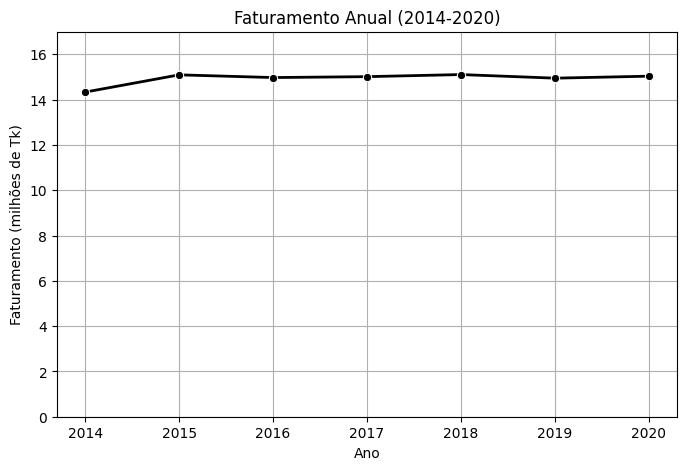

In [10]:
# Cria o gráfico de linha.
plt.figure(figsize=(8, 5))  # Define o tamanho do gráfico.
sns.lineplot(x="Ano", y=df_faturamentoano["Faturamento_Total_Ano"] / 1_000_000, data=df_faturamentoano, marker="o", color="black", linewidth=2)

# Personaliza o gráfico.
plt.xlabel("Ano")
plt.ylabel("Faturamento (milhões de Tk)")
plt.title("Faturamento Anual (2014-2020)")
plt.grid(True)  # Adiciona grades ao gráfico.

# Ajusta o formato do eixo Y para exibir os valores no formato brasileiro.
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f"{x:,.0f}".replace(",", "X").replace(".", ",").replace("X", ".")))

# Ajusta os limites dos eixos.
plt.gca().set_ylim(0, 17)  

plt.show()

Sob a ótica anual, prejudicado pelo faturamento muito abaixo do esperado em janeiro, o valor médio de 2014 mostra-se um pouco abaixo da média dos demais anos. Em seguida, a partir de 2015, o faturamento apresenta crescimento e mantém-se estável por toda a série temporal. 2021 não foi incluído nesta análise, pois, diferentes dos outros anos, em que foram coletados dados dos 12 meses, neste foi coletado apenas em janeiro.

In [11]:
df_faturamentomesano2014 = pd.read_sql_query("""
    SELECT SUM(total_price) AS Faturamento_Total_Mes, month AS Mes, year AS Ano
    FROM dfecommerce
    WHERE year = '2014'
    GROUP BY Mes, Ano
    ORDER BY Ano, Mes
""", con) # Gera a consulta SQl e salva no DataFrame pandas.

df_faturamentomesano2014.head()

,Faturamento_Total_Mes,Mes,Ano
0,496549.25,1,2014
1,1122547.00,2,2014
2,1262435.75,3,2014
3,1245142.50,4,2014
4,1268770.50,5,2014


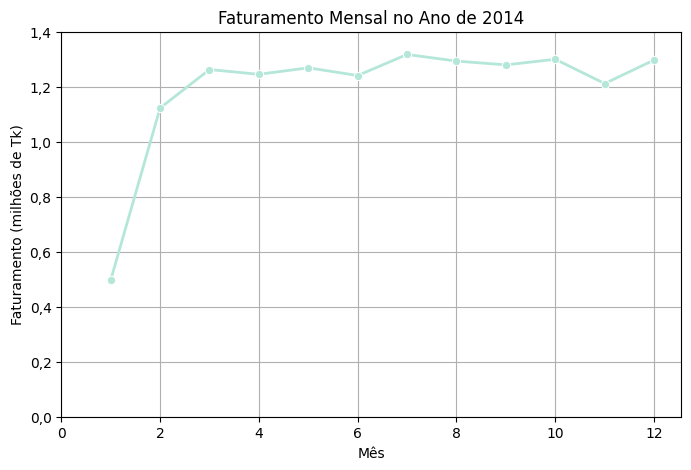

In [12]:
# Cria o gráfico de linha.
plt.figure(figsize=(8, 5)) # Define o tamanho do gráfico.
sns.lineplot(x="Mes", y=df_faturamentomesano2014["Faturamento_Total_Mes"] / 1_000_000, data=df_faturamentomesano2014, marker="o", color="#B4E7D9", linewidth=2)

# Personaliza o gráfico.
plt.xlabel("Mês")
plt.ylabel("Faturamento (milhões de Tk)")
plt.title("Faturamento Mensal no Ano de 2014")
plt.grid(True) # Adiciona grades ao gráfico.

# Ajusta o formato do eixo Y para exibir os valores no formato brasileiro.
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f"{x:,.1f}".replace(",", "X").replace(".", ",").replace("X", ".")))

# Ajusta os limites dos eixos.
plt.gca().set_ylim(0, 1.4) # Define limites inferiores e superiores do Eixo Y.
plt.gca().set_xlim(left=0) # Eixo X começa em 0.

plt.show()

In [13]:
df_faturamentomesano2015 = pd.read_sql_query("""
    SELECT SUM(total_price) AS Faturamento_Total_Mes, month AS Mes, year AS Ano
    FROM dfecommerce
    WHERE year = '2015'
    GROUP BY Mes, Ano
    ORDER BY Ano, Mes
""", con) # Gera a consulta SQl e salva no DataFrame pandas.

df_faturamentomesano2015.head()

,Faturamento_Total_Mes,Mes,Ano
0,1239765.00,1,2015
1,1157159.75,2,2015
2,1296063.75,3,2015
3,1193564.00,4,2015
4,1345707.75,5,2015


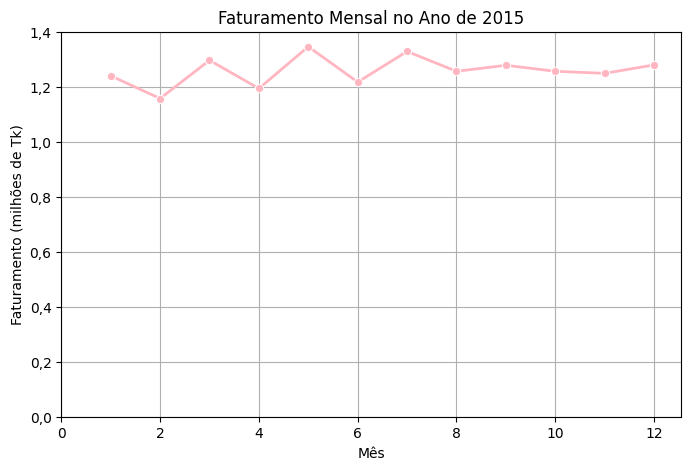

In [14]:
# Cria o gráfico de linha.
plt.figure(figsize=(8, 5)) # Define o tamanho do gráfico.
sns.lineplot(x="Mes", y=df_faturamentomesano2015["Faturamento_Total_Mes"] / 1_000_000, data=df_faturamentomesano2015, marker="o", color="#FFB6C1", linewidth=2)

# Personaliza o gráfico.
plt.xlabel("Mês")
plt.ylabel("Faturamento (milhões de Tk)")
plt.title("Faturamento Mensal no Ano de 2015")
plt.grid(True) # Adiciona grades ao gráfico.

# Ajusta o formato do eixo Y para exibir os valores no formato brasileiro.
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f"{x:,.1f}".replace(",", "X").replace(".", ",").replace("X", ".")))

# Ajusta os limites dos eixos.
plt.gca().set_ylim(0, 1.4) # Define limites inferiores e superiores do Eixo Y.
plt.gca().set_xlim(left=0) # Eixo X começa em 0.

plt.show()

In [15]:
df_faturamentomesano2016 = pd.read_sql_query("""
    SELECT SUM(total_price) AS Faturamento_Total_Mes, month AS Mes, year AS Ano
    FROM dfecommerce
    WHERE year = '2016'
    GROUP BY Mes, Ano
    ORDER BY Ano, Mes
""", con) # Gera a consulta SQl e salva no DataFrame pandas.

df_faturamentomesano2016.head()

,Faturamento_Total_Mes,Mes,Ano
0,1202031.50,1,2016
1,1222807.25,2,2016
2,1312405.75,3,2016
3,1217547.00,4,2016
4,1313370.50,5,2016


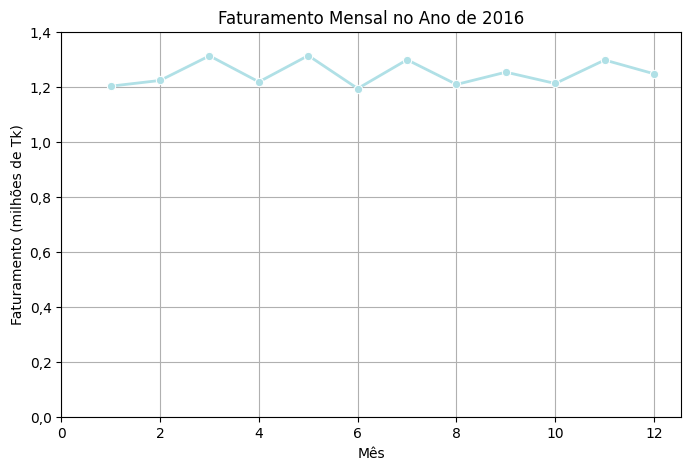

In [16]:
# Cria o gráfico de linha.
plt.figure(figsize=(8, 5)) # Define o tamanho do gráfico.
sns.lineplot(x="Mes", y=df_faturamentomesano2016["Faturamento_Total_Mes"] / 1_000_000, data=df_faturamentomesano2016, marker="o", color="#B0E0E6", linewidth=2)

# Personaliza o gráfico.
plt.xlabel("Mês")
plt.ylabel("Faturamento (milhões de Tk)")
plt.title("Faturamento Mensal no Ano de 2016")
plt.grid(True) # Adiciona grades ao gráfico.

# Ajusta o formato do eixo Y para exibir os valores no formato brasileiro.
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f"{x:,.1f}".replace(",", "X").replace(".", ",").replace("X", ".")))

# Ajusta os limites dos eixos.
plt.gca().set_ylim(0, 1.4) # Define limites inferiores e superiores do Eixo Y.
plt.gca().set_xlim(left=0) # Eixo X começa em 0.

plt.show()

In [17]:
df_faturamentomesano2017 = pd.read_sql_query("""
    SELECT SUM(total_price) AS Faturamento_Total_Mes, month AS Mes, year AS Ano
    FROM dfecommerce
    WHERE year = '2017'
    GROUP BY Mes, Ano
    ORDER BY Ano, Mes
""", con) # Gera a consulta SQl e salva no DataFrame pandas.

df_faturamentomesano2017.head()

,Faturamento_Total_Mes,Mes,Ano
0,1293917.25,1,2017
1,1144129.50,2,2017
2,1261669.25,3,2017
3,1238081.25,4,2017
4,1286428.50,5,2017


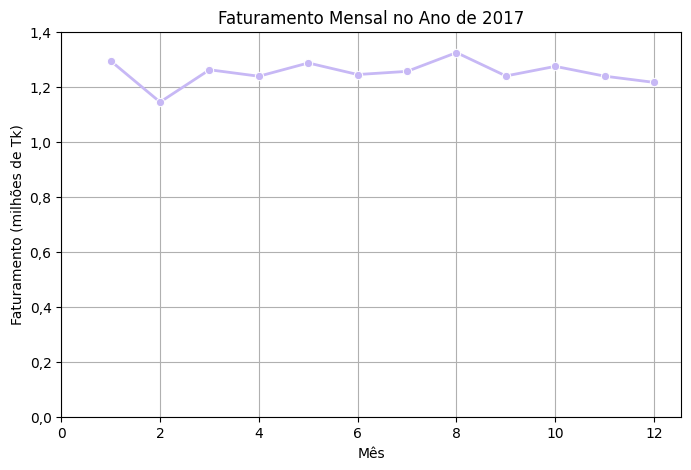

In [18]:
# Cria o gráfico de linha.
plt.figure(figsize=(8, 5)) # Define o tamanho do gráfico.
sns.lineplot(x="Mes", y=df_faturamentomesano2017["Faturamento_Total_Mes"] / 1_000_000, data=df_faturamentomesano2017, marker="o", color="#C7B8F5", linewidth=2)

# Personaliza o gráfico.
plt.xlabel("Mês")
plt.ylabel("Faturamento (milhões de Tk)")
plt.title("Faturamento Mensal no Ano de 2017")
plt.grid(True) # Adiciona grades ao gráfico.

# Ajusta o formato do eixo Y para exibir os valores no formato brasileiro.
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f"{x:,.1f}".replace(",", "X").replace(".", ",").replace("X", ".")))

# Ajusta os limites dos eixos.
plt.gca().set_ylim(0, 1.4) # Define limites inferiores e superiores do Eixo Y.
plt.gca().set_xlim(left=0) # Eixo X começa em 0.

plt.show()

In [19]:
df_faturamentomesano2018 = pd.read_sql_query("""
    SELECT SUM(total_price) AS Faturamento_Total_Mes, month AS Mes, year AS Ano
    FROM dfecommerce
    WHERE year = '2018'
    GROUP BY Mes, Ano
    ORDER BY Ano, Mes
""", con) # Gera a consulta SQl e salva no DataFrame pandas.

df_faturamentomesano2018.head()

,Faturamento_Total_Mes,Mes,Ano
0,1292509.50,1,2018
1,1148761.50,2,2018
2,1252282.50,3,2018
3,1197510.00,4,2018
4,1331593.25,5,2018


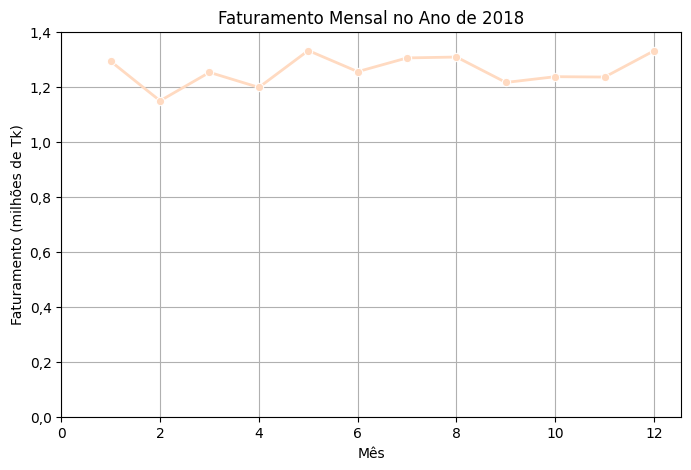

In [20]:
# Cria o gráfico de linha.
plt.figure(figsize=(8, 5)) # Define o tamanho do gráfico.
sns.lineplot(x="Mes", y=df_faturamentomesano2018["Faturamento_Total_Mes"] / 1_000_000, data=df_faturamentomesano2018, marker="o", color="#FFDAC1", linewidth=2)

# Personaliza o gráfico.
plt.xlabel("Mês")
plt.ylabel("Faturamento (milhões de Tk)")
plt.title("Faturamento Mensal no Ano de 2018")
plt.grid(True) # Adiciona grades ao gráfico.

# Ajusta o formato do eixo Y para exibir os valores no formato brasileiro.
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f"{x:,.1f}".replace(",", "X").replace(".", ",").replace("X", ".")))

# Ajusta os limites dos eixos.
plt.gca().set_ylim(0, 1.4) # Define limites inferiores e superiores do Eixo Y.
plt.gca().set_xlim(left=0) # Eixo X começa em 0.

plt.show()

In [21]:
df_faturamentomesano2019 = pd.read_sql_query("""
    SELECT SUM(total_price) AS Faturamento_Total_Mes, month AS Mes, year AS Ano
    FROM dfecommerce
    WHERE year = '2019'
    GROUP BY Mes, Ano
    ORDER BY Ano, Mes
""", con) # Gera a consulta SQl e salva no DataFrame pandas.

df_faturamentomesano2019.head()

,Faturamento_Total_Mes,Mes,Ano
0,1341867.0,1,2019
1,1149508.5,2,2019
2,1295730.0,3,2019
3,1201298.0,4,2019
4,1266431.5,5,2019


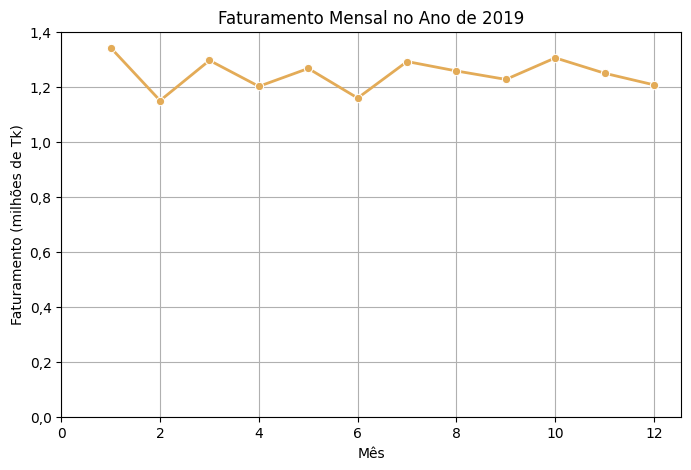

In [22]:
# Cria o gráfico de linha.
plt.figure(figsize=(8, 5)) # Define o tamanho do gráfico.
sns.lineplot(x="Mes", y=df_faturamentomesano2019["Faturamento_Total_Mes"] / 1_000_000, data=df_faturamentomesano2019, marker="o", color="#E3AB57", linewidth=2)

# Personaliza o gráfico.
plt.xlabel("Mês")
plt.ylabel("Faturamento (milhões de Tk)")
plt.title("Faturamento Mensal no Ano de 2019")
plt.grid(True) # Adiciona grades ao gráfico.

# Ajusta o formato do eixo Y para exibir os valores no formato brasileiro.
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f"{x:,.1f}".replace(",", "X").replace(".", ",").replace("X", ".")))

# Ajusta os limites dos eixos.
plt.gca().set_ylim(0, 1.4) # Define limites inferiores e superiores do Eixo Y.
plt.gca().set_xlim(left=0) # Eixo X começa em 0.

plt.show()

In [23]:
df_faturamentomesano2020 = pd.read_sql_query("""
    SELECT SUM(total_price) AS Faturamento_Total_Mes, month AS Mes, year AS Ano
    FROM dfecommerce
    WHERE year = '2020'
    GROUP BY Mes, Ano
    ORDER BY Ano, Mes
""", con) # Gera a consulta SQl e salva no DataFrame pandas.

df_faturamentomesano2020.head()

,Faturamento_Total_Mes,Mes,Ano
0,1291832.25,1,2020
1,1128964.00,2,2020
2,1258565.00,3,2020
3,1211492.00,4,2020
4,1265700.50,5,2020


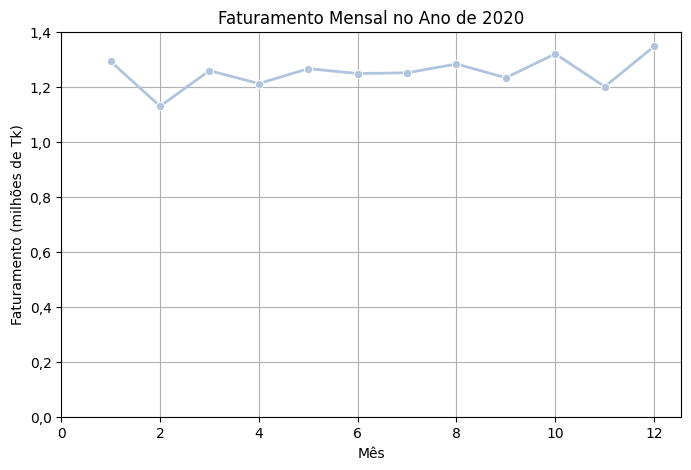

In [24]:
# Cria o gráfico de linha.
plt.figure(figsize=(8, 5)) # Define o tamanho do gráfico.
sns.lineplot(x="Mes", y=df_faturamentomesano2020["Faturamento_Total_Mes"] / 1_000_000, data=df_faturamentomesano2020, marker="o", color="#B0C4DE", linewidth=2)

# Personaliza o gráfico.
plt.xlabel("Mês")
plt.ylabel("Faturamento (milhões de Tk)")
plt.title("Faturamento Mensal no Ano de 2020")
plt.grid(True) # Adiciona grades ao gráfico.

# Ajusta o formato do eixo Y para exibir os valores no formato brasileiro.
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f"{x:,.1f}".replace(",", "X").replace(".", ",").replace("X", ".")))

# Ajusta os limites dos eixos.
plt.gca().set_ylim(0, 1.4) # Define limites inferiores e superiores do Eixo Y.
plt.gca().set_xlim(left=0) # Eixo X começa em 0.

plt.show()

In [25]:
df_faturamentomesano2021= pd.read_sql_query("""
    SELECT SUM(total_price) AS Faturamento_Total_Mes, month AS Mes, year AS Ano
    FROM dfecommerce
    WHERE year = '2021'
    GROUP BY Mes, Ano
    ORDER BY Ano, Mes
""", con) # Gera a consulta SQl e salva no DataFrame pandas.

df_faturamentomesano2021.head()

,Faturamento_Total_Mes,Mes,Ano
0,883772.25,1,2021


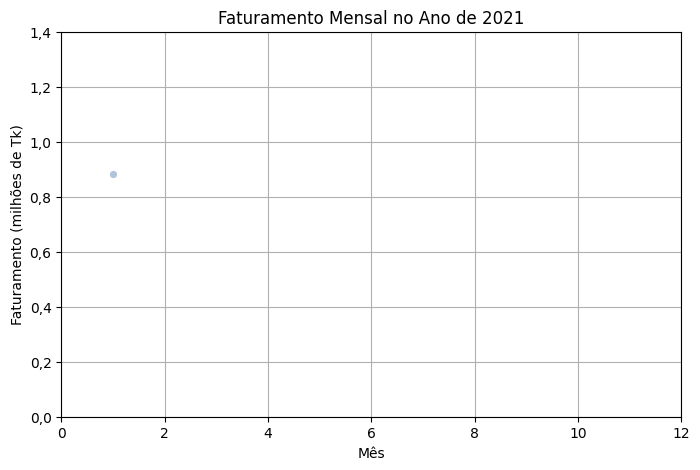

In [26]:
# Cria o gráfico de linha.
plt.figure(figsize=(8, 5)) # Define o tamanho do gráfico.
sns.lineplot(x="Mes", y=df_faturamentomesano2021["Faturamento_Total_Mes"] / 1_000_000, data=df_faturamentomesano2021, marker="o", color="#B0C4DE", linewidth=2)

# Personaliza o gráfico.
plt.xlabel("Mês")
plt.ylabel("Faturamento (milhões de Tk)")
plt.title("Faturamento Mensal no Ano de 2021")
plt.grid(True) # Adiciona grades ao gráfico.

# Ajusta o formato do eixo Y para exibir os valores no formato brasileiro.
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f"{x:,.1f}".replace(",", "X").replace(".", ",").replace("X", ".")))

# Ajusta os limites dos eixos.
plt.gca().set_ylim(0, 1.4) # Define limites inferiores e superiores do Eixo Y.
plt.gca().set_xlim(0, 12) # Eixo X começa em 0.

plt.show()

Avaliando, individualmente, cada um dos gráficos sob a perspectiva mensal e anual, percebe-se que, em geral, a partir de fevereiro, todos delineiam comportamentos muitos semelhantes de sazonalidade e tendência. Com exceção dos gráficos dos anos de 2014, 2016 e 2021, que não dão início à serie temporal com faturamento em alta, no mês de janeiro, todos os outros dão. Um aspecto que diferencia, minimamente, o gráfico do ano de 2020 dos demais é a baixa variação de valores entre os meses de maio e setembro. Neste mesmo intervalo, nos outros anos, é possível notar maior variação do faturamento mensal, o que se apresenta de forma mais sutil em 2020. Ademais, quanto ao último mês de cada um dos anos, 2014, 2018 e 2020 finalizam a série com alta na arrecadação, enquanto 2015, 2016, 2017 e 2019, concluem com queda. 

## Quais são as 10 lojas que mais faturaram?

In [27]:
df_top10lojas_faturamento = pd.read_sql_query("""
    SELECT SUM(total_price) AS Faturamento_Total_Loja, store_key AS Cod_Loja
    FROM dfecommerce
    GROUP BY Cod_Loja
    ORDER BY Faturamento_Total_Loja DESC
    LIMIT 10
""", con)

df_top10lojas_faturamento.head(10)

,Faturamento_Total_Loja,Cod_Loja
0,159409.00,S0010
1,158027.50,S00601
2,157692.00,S00328
3,157483.00,S0039
4,157377.50,S0080
5,157243.50,S00357
6,156979.50,S00411
7,156793.75,S00708
8,156767.75,S00687
9,156651.50,S00266


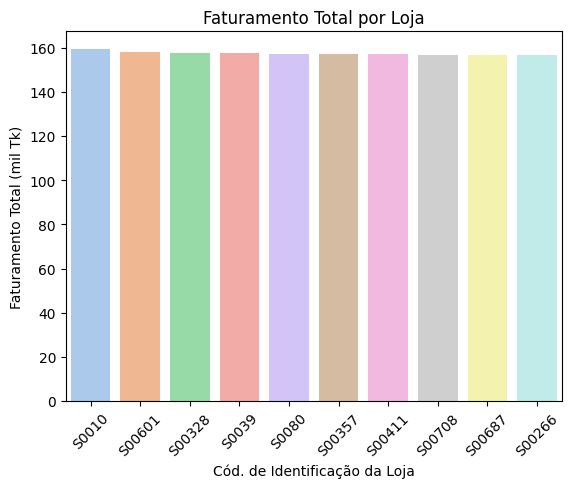

In [28]:
# Cria o gráfico de barras.
sns.barplot(data=df_top10lojas_faturamento, x="Cod_Loja", y=df_top10lojas_faturamento["Faturamento_Total_Loja"] / 1_000, palette="pastel")

# Rotaciona os rótulos do eixo X.
plt.xticks(rotation=45) # Rotaciona os rótulos em 45 graus.

# Define títulos.
plt.xlabel("Cód. de Identificação da Loja")
plt.ylabel("Faturamento Total (mil Tk)")
plt.title("Faturamento Total por Loja")

# Ajusta o formato do eixo Y para exibir os valores no formato brasileiro.
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f"{x:,.0f}".replace(",", "X").replace(".", ",").replace("X", ".")))

plt.show()

Ao avaliar a performance de faturamento das lojas, obtém-se informações valiosas para, por exemplo, definir o direcionamento de esforços às unidades, traçar estratégias personalizadas e compreender como o consumo pode diferenciar-se geograficamente. A interpretação dos resultados gráficos aponta para a homogeneidade do faturamento entre as 10 lojas que mais venderam. 

In [29]:
topdist_lojas_faturamento_dist= dfecommerce[dfecommerce['store_key'].isin(df_top10lojas_faturamento['Cod_Loja'])]['district'].unique() 
                                                                                                                      # Traz de dfecommerce os valores da 
                                                                                                                      # coluna district onde os valores de 
                                                                                                                      # store_key são iguais aos de store_key 
                                                                                                                      # em df_top10lojas_faturamento.

topdist_lojas_faturamento_dist # Apresenta o array resultante.

array(['MADARIPUR', 'MAULVIBAZAR', 'DHAKA', 'NARAYANGANJ', 'CHITTAGONG',
       'BRAHMANBARIA', 'DINAJPUR', 'PANCHAGARH'], dtype=object)

Conhecer a localização distrital das 10 lojas com maior faturamento viabiliza, junto da análise anterior, a compreensão do perfil geográfico do consumo e a identificação de regiões do país em que há oportunidade de investimentos, bem como, razões que expliquem possíveis desempenhos negativos. 

## Qual é a distribuição geografica do faturamento?

In [30]:
df_division_faturamento = pd.read_sql_query("""
    SELECT SUM(total_price) AS Faturamento_Total, division AS Cidade
    FROM dfecommerce
    GROUP BY Cidade
    ORDER BY Faturamento_Total DESC
    LIMIT 10
""", con)

df_division_faturamento.head(10)

,Faturamento_Total,Cidade
0,40764619.75,DHAKA
1,19763595.00,CHITTAGONG
2,12099196.00,RAJSHAHI
3,11311610.50,KHULNA
4,8429836.50,RANGPUR
5,7520343.75,BARISAL
6,5512234.25,SYLHET


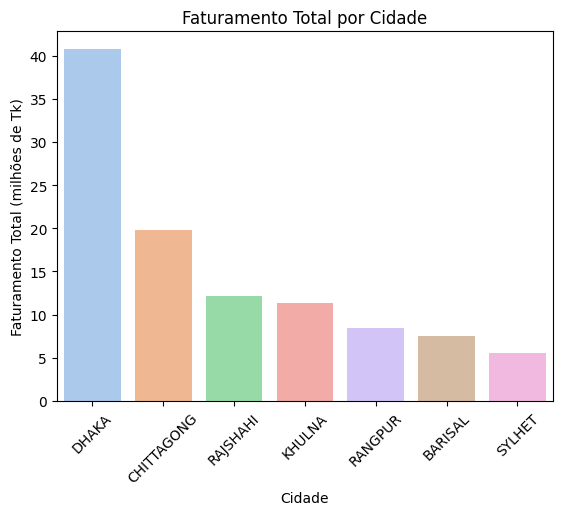

In [31]:
# Cria o gráfico de barras.
sns.barplot(data=df_division_faturamento, x="Cidade", y=df_division_faturamento["Faturamento_Total"] / 1_000_000, palette="pastel")

# Rotaciona os rótulos do eixo X.
plt.xticks(rotation=45) # Rotaciona os rótulos em 45 graus.

# Define títulos.
plt.xlabel("Cidade")
plt.ylabel("Faturamento Total (milhões de Tk)")
plt.title("Faturamento Total por Cidade")

# Ajusta o formato do eixo Y para exibir os valores no formato brasileiro.
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f"{x:,.0f}".replace(",", "X").replace(".", ",").replace("X", ".")))

plt.show() 

Analisando o gráfico acima conclui-se que há uma grande discrepância (Tk 20 Mi) entre o faturamento das lojas presentes em Dakha e nas outras cidades. Tal observação faz sentido, considerando que se trata da capital da Bangladesh. Chittagong, a segunda maior cidade do país, conta com, aproximadamente, de acordo com dados da UN World Urbanization Prospects, 5,5 milhões de habitantes, enquanto Dhaka abriga 10 milhões (megacidade). Em consonância, o faturamento da capital é o dobro de Chittagong. Informações como essa são relevantes para definição estratégica sob todos os aspectos do negócio. A abertura de novas lojas, previsão de público, estimativa de lucro, dentre outras métricas, podem ser impactadas por esses dados. 

## Qual é a correlação entre o número de habitantes de cada cidade, em que há lojas, e o faturamento?

In [32]:
df_populacao_faturamento = pd.read_sql_query("""
    SELECT SUM(total_price) AS Faturamento, population AS Populacao, (SUM(total_price)/population) AS Faturamento_Percapita, COUNT(store_key) AS N_Lojas, division AS Cidade
    FROM dfecommerce
    GROUP BY Populacao, Cidade
    ORDER BY Faturamento DESC
    LIMIT 10
""", con)

df_populacao_faturamento.head(10)

,Faturamento,Populacao,Faturamento_Percapita,N_Lojas,Cidade
0,40764619.75,10200000,3.996531,386888,DHAKA
1,19763595.00,5500000,3.593381,187340,CHITTAGONG
2,12099196.00,553300,21.867334,115075,RAJSHAHI
3,11311610.50,965500,11.715806,107164,KHULNA
4,8429836.50,343100,24.569620,79926,RANGPUR
5,7520343.75,202200,37.192600,71444,BARISAL
6,5512234.25,237000,23.258372,52163,SYLHET


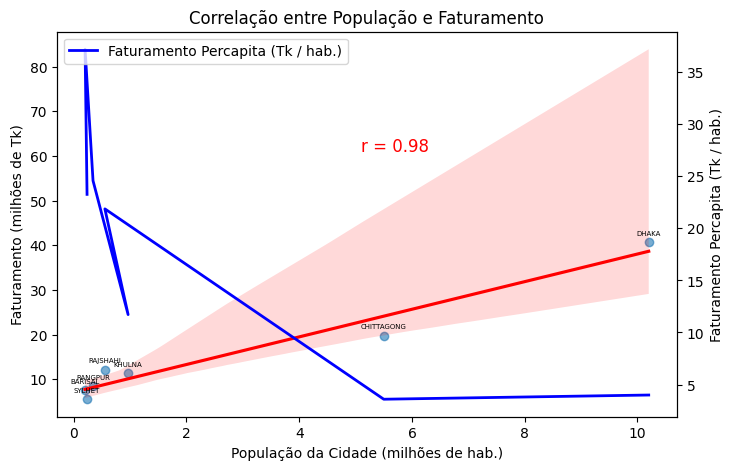

In [33]:
# Calcula a correlação de Pearson
correlacao, _ = pearsonr(df_populacao_faturamento["Populacao"], df_populacao_faturamento["Faturamento"])

# Criar a figura
fig, ax1 = plt.subplots(figsize=(8, 5))

# Gráfico de dispersão com linha de regressão
sns.regplot(
    data=df_populacao_faturamento, 
    x="Populacao", 
    y="Faturamento", 
    scatter_kws={"alpha": 0.6}, 
    line_kws={"color": "red"},
    ax=ax1
)

# Adiciona o coeficiente de correlação no gráfico
ax1.text(
    df_populacao_faturamento["Populacao"].max() * 0.5, 
    df_populacao_faturamento["Faturamento"].max() * 1.5, 
    f"r = {correlacao:.2f}", 
    fontsize=12, 
    color="red"
)

# Títulos e rótulos para o gráfico de dispersão
ax1.set_xlabel("População da Cidade (milhões de hab.)")
ax1.set_ylabel("Faturamento (milhões de Tk)")
ax1.set_title("Correlação entre População e Faturamento")

# Formatação do eixo Y para exibir os valores divididos por 1.000.000
ax1.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f"{x / 1_000_000:.0f}"))
ax1.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f"{x / 1_000_000:.0f}"))

# Adicionar o nome das cidades acima dos pontos
for i, row in df_populacao_faturamento.iterrows():
    ax1.annotate(
        row["Cidade"],  # Nome da cidade
        (row["Populacao"], row["Faturamento"]),  # Coordenadas do ponto
        textcoords="offset points",
        xytext=(0, 5),  # Desloca 5 pontos acima do ponto
        ha='center', fontsize=5, color="black"
    )

# Criar o segundo eixo Y (à direita) para o gráfico de linha
ax2 = ax1.twinx()

# Gráfico de linha no segundo eixo Y
ax2.plot(
    df_populacao_faturamento["Populacao"], 
    df_populacao_faturamento["Faturamento_Percapita"],  # Ajusta o faturamento para milhões
    color="blue", 
    label="Faturamento Percapita (Tk / hab.)", 
    linewidth=2
)

# Rótulo para o eixo Y do gráfico de linha
ax2.set_ylabel("Faturamento Percapita (Tk / hab.)")

# Exibe a legenda para o gráfico de linha
ax2.legend(loc="upper left")

# Exibe o gráfico
plt.show()


Após calcular a correlação de Pearson entre as duas variáveis e emití-la no gráfico acima, o resultado obtido indica uma alta correlação positiva entre o número de habitantes das cidades e o faturamento total das lojas nelas localizadas. O coeficiente r = 0.98, demonstra que quanto maior for a população de uma cidade, maior será o potencial de faturamento dos estabelecimentos nela presentes. Assim, conclui-se que, a dimensão populacional de uma cidade, como já se poderia supor, deve ser um dos fatores de maior importância na definição de estratégias de expansão. 

Há, no entanto, um importante aspecto a ser explicado: ao incorporar mais detalhes à avaliação, observa-se que Dhaka e Chittagong, apesar de serem, respectivamente, a maior e segunda maior cidades do país, em número de lojas da rede e em número de habitantes, apresentam um faturamento percapita inferior ao das cidades menores. A baixa adesão dos habitantes, de ambas as metrópoles, inspira aprofundamento da análise e traz algumas hipóteses: campanhas de marketing mal sucedidas, organizações concorrentes mais competitivas e necessidade de melhora na estratégia de localização das lojas são algumas delas.

## Quais são os 20 bancos mais populares entre os meios de pagamento?

In [34]:
df_topbanks = pd.read_sql_query("""
    SELECT SUM(total_price) AS Valor_Total, bank_name AS Banco
    FROM dfecommerce
    GROUP BY Banco
    ORDER BY Valor_Total DESC
    LIMIT 20
""", con)

df_topbanks.head(10)

,Valor_Total,Banco
0,2730999.25,Bangladesh Commerce Bank Limited
1,2728515.50,AB Bank Limited
2,2728366.00,Dhaka Bank Limited
3,2728115.25,South Bangla Agriculture and Commerce Bank Lim...
4,2727661.00,Standard Bank Limited
5,2723363.00,National Credit & Commerce Bank Limited
6,2723215.25,Citizens Bank Limited
7,2720974.50,Rocket
8,2720807.00,Trust Bank Limited
9,2715279.00,Modhumoti Bank Limited


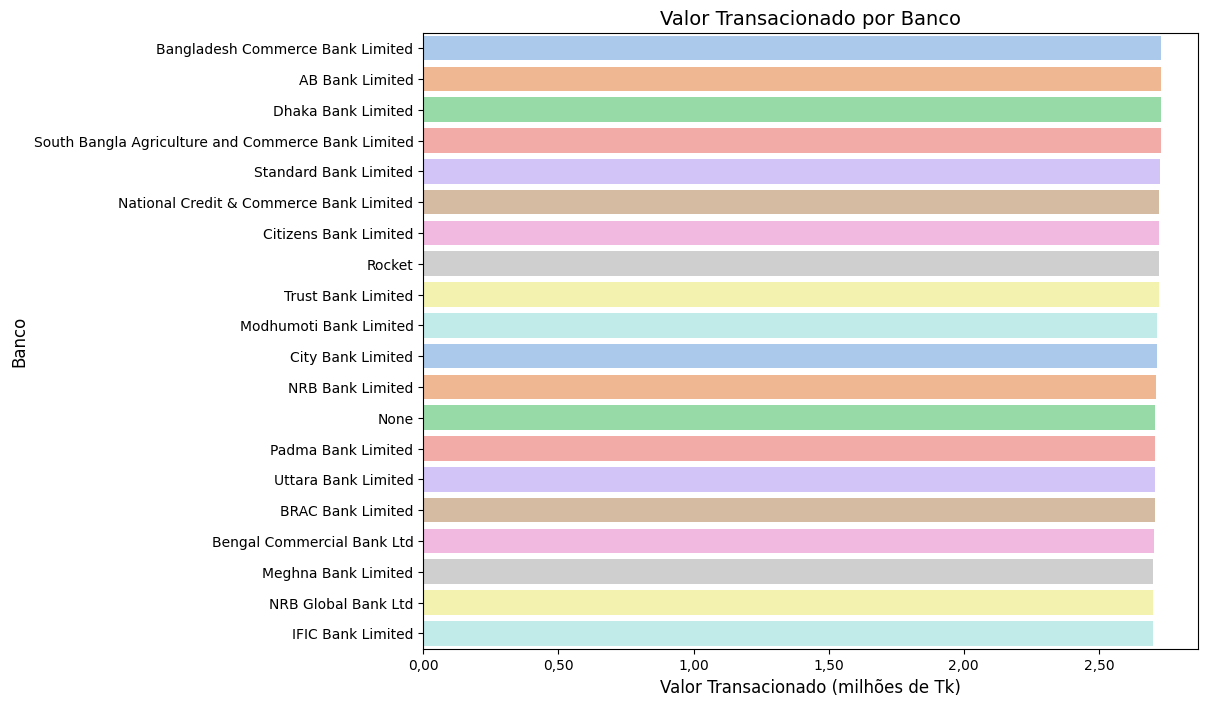

In [35]:
# Cria o gráfico de barras.
plt.figure(figsize=(10, 8)) # Define o tamanho do gráfico.
sns.barplot(data=df_topbanks, x=df_topbanks["Valor_Total"] / 1_000_000, y="Banco", palette="pastel")

# Define títulos.
plt.xlabel("Valor Transacionado (milhões de Tk)", fontsize=12)
plt.ylabel("Banco", fontsize=12)
plt.title("Valor Transacionado por Banco", fontsize=14)

# Ajusta o formato do eixo X para exibir os valores no formato brasileiro.
plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f"{x:,.2f}".replace(",", "X").replace(".", ",").replace("X", ".")))

plt.show()

Quando avaliado o valor transacionado a partir dos 20 principais bancos utilizados pelos clientes, o gráfico acima revela que não há grandes alterações entre eles. Embora, neste caso, nenhum banco tenha se destacado em relação aos outros, análises como esta podem ser importantes para enriquecer o perfil conhecido dos clientes e definir, por exemplo, possíveis parcerias com instituições financeiras.

## Qual é a relação entre tipo de pagamento e quantia paga?

In [36]:
dfec_soma_tipopag_price = dfecommerce.groupby('trans_type').agg({'total_price':'sum'}) 

dfec_soma_tipopag_price.head(10)

,total_price
trans_type,
card,94583038.50
cash,2708515.75
mobile,8109881.50


In [37]:
dfec_soma_tipopag_price = dfec_soma_tipopag_price.reset_index(drop = False)

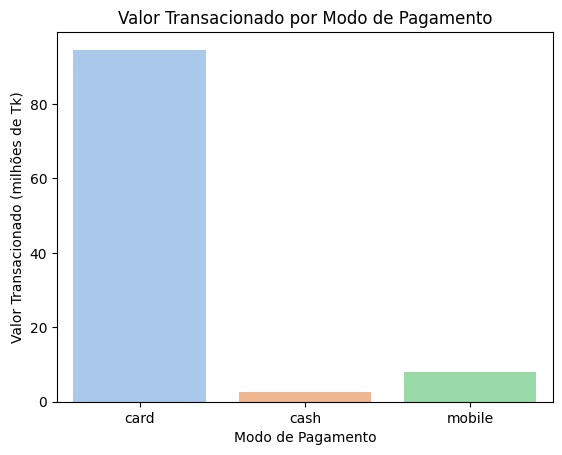

In [38]:
# Cria o gráfico de barras.
sns.barplot(data=dfec_soma_tipopag_price, x="trans_type", y=dfec_soma_tipopag_price["total_price"] / 1_000_000, palette="pastel")

# Define títulos.
plt.xlabel("Modo de Pagamento")
plt.ylabel("Valor Transacionado (milhões de Tk)")
plt.title("Valor Transacionado por Modo de Pagamento")

# Ajusta o formato do eixo Y para mostrar números inteiros, sem notação científica.
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{int(x):,}'))

plt.show()

Partindo do mesmo entendimento da análise anterior, o que este gráfico informa complementa os dados dos clientes e promove a melhor compreensão de seus comportamentos. Além disso, também pode servir como justificativa para parcerias, neste caso, com empresas de cartão de crédito.

## Como perdura a relação com os fornecedores ao longo do tempo?

In [39]:
df_product = pd.read_sql_query("""
    SELECT SUM(total_price) AS Faturamento, supplier AS Fornecedor, year AS Ano
    FROM dfecommerce
    WHERE year != '2021'
    GROUP BY Fornecedor, Ano
    ORDER BY Ano, Fornecedor
""", con)

df_product.head(10)

,Faturamento,Fornecedor,Ano
0,1592542.75,BIGSO AB,2014
1,1431322.75,Bolsius Boxmeer,2014
2,819131.00,"CHERRY GROUP CO.,LTD",2014
3,1506275.50,CHROMADURLIN S.A.S,2014
4,1788469.00,DENIMACH LTD,2014
5,1500703.25,Friedola 1888 GmbH,2014
6,1288038.25,HARDFORD AB,2014
7,1787452.00,Indo Count Industries Ltd,2014
8,1336980.00,MAESA SAS,2014
9,1283816.75,NINGBO SEDUNO IMP & EXP CO.LTD,2014


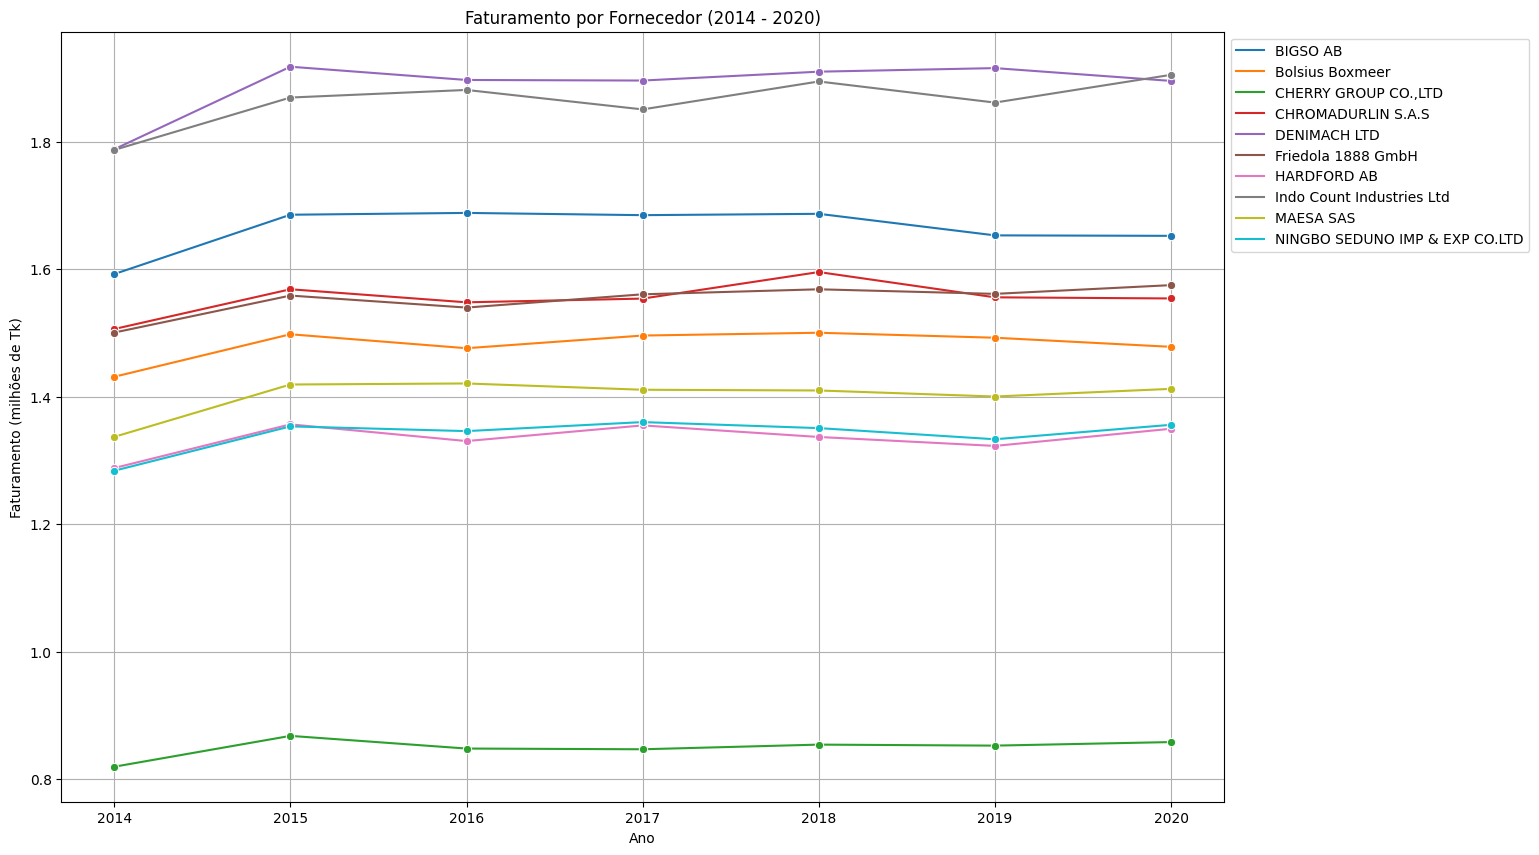

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns

# Tamanho do gráfico
plt.figure(figsize=(15, 10)) 

# Gráfico de linha
sns.lineplot(data=df_product, x="Ano", y=df_product["Faturamento"] / 1_000_000, hue="Fornecedor", marker="o")

# Títulos e rótulos
plt.xlabel("Ano")
plt.ylabel("Faturamento (milhões de Tk)")
plt.title("Faturamento por Fornecedor (2014 - 2020)")

# Ajustando a legenda para fora da área de plotagem
plt.legend(loc="upper left", bbox_to_anchor=(1, 1))  # Movendo a legenda para a direita
plt.grid(True)

# Exibe o gráfico
plt.show()



As relações definidas para esta análise partem do mesmo princípio que a análise por países, pois não há entre os dados informações diretas sobre os negócios feitos entre fornecedores e a organização em questão. 

Analisando o gráfico apresentado que indica, para cada um dos fornecedores, o faturamento com a venda dos produtos por eles fornecidos, para cada ano, é possível observar a posição de cada fornecedor, do maior (DENIMACH LTD) para o menor (CHERRY GROUP CO., LTD), quanto a sua importância no faturamento da organização.

Nota-se, também, que o faturamento obtido se manteve estável, ao longo do tempo, em relação a todos os fornecedores. Isso indica que nenhum fornecedor aumentou ou diminuiu seu impacto no faturamento. Todos caracterizam-se por um início, em 2014, cujos valores são um pouco menores do que para os demais anos, mas que logo aumentam e tendem a manter-se até o fim da série temporal. 

Vale lembrar que, como a análise feita leva em consideração a média anual de faturamento, o ano de 2021 não foi considerado, pois foram coletados dados apenas de janeiro deste ano.

In [41]:
con.commit()
con.close()